# M1221215 朱鴻銘

## 特徵提取12個時域特徵與8個頻域特徵

In [1]:
# Step1_Data_Preprocessing
# Substitute missing value with mean value
# Prepare three csv files
# Author: Yuan-Jen Chang, Feng Chia University, imCLOUD CO.,LTD.
# Date: Sep. 18 2024

# Importing the libraries
import os
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import csv
from scipy.stats import kurtosis
from scipy.stats import skew  # skewness

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
##### Original: fourier_transform #########
def fourier_transform(data,lenFeature):
    '''
    Fourier transform of the raw signal
    '''
    rawdata=len(data)
    m=lenFeature
    myfft = np.zeros((rawdata, m))  #做出一個38400列，20欄的矩陣存放fft數值
    myfft2 = np.zeros((rawdata2, m))  #做出一個19200列，20欄的矩陣存放fft數值
    for ii in range(m):
    #    sample[0,ii] = data[:,ii]
        myfft[:,ii] = abs(fft(data[:,ii]))*2/len(data[:,ii])
        myfft2[:,ii] = myfft[0:rawdata2,ii]

    # 將myfft2寫入csv檔案
    os.chdir(csvDirectory) # Change directory to csv file directory
#    with open('myfft_healthy.csv', 'w', newline='') as csvfile:
#      writer = csv.writer(csvfile)
#      writer.writerow(dataset.columns)
#      writer.writerows(myfft2)
    # 將myfft2繪圖
    plt.figure()
    plt.plot(freq,myfft2[:,0])
    #plt.axis([0, 120, 0, 0.02]) #set x and y - axis range
    plt.axis([0, 800, 0, 0.02]) #set x and y - axis range
    plt.ylabel('Amplitude')
    plt.xlabel('Hz')
    plt.title('fourier_transform')
    plt.show
    return myfft2


In [4]:
# Define directories
currentDirectory = '/content/drive/MyDrive/PHM_2024_Group6' # root Directory
healthyDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy'
faulty1DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1'
faulty2DataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2'
testingDataDirectory='/content/drive/MyDrive/PHM_2024_Group6/Data/Testing'
csvDirectory='/content/drive/MyDrive/PHM_2024_Group6/csv'
featureDirectory='/content/drive/MyDrive/PHM_2024_Group6/myfeature'

#print(currentDirectory)
print(healthyDataDirectory)
print(faulty1DataDirectory)
print(faulty2DataDirectory)
print(testingDataDirectory)
print(csvDirectory)
print(featureDirectory)

/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Healthy
/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty1
/content/drive/MyDrive/PHM_2024_Group6/Data/Training/Faulty2
/content/drive/MyDrive/PHM_2024_Group6/Data/Testing
/content/drive/MyDrive/PHM_2024_Group6/csv
/content/drive/MyDrive/PHM_2024_Group6/myfeature


In [5]:
# Define parameters
rawdata=45000
rawdata2=int(45000/2)
n=rawdata
Fs = 9000
T = 1/Fs
dF = Fs/n
t = np.linspace(0,rawdata-1,rawdata)*T
freq = np.linspace(0,rawdata2-1,rawdata2)*dF
rpm=10000

baseFreq1=150 #基頻
dFreq1=5;dFreq2=8;dFreq3=10;dFreq4=12
len1=20 #20個特徵 for each signal(x-axis, y-axis, z-axis, Voltage)
training_file_num = 0
m=48   #healthy, Faulty1, Faulty12訓練資料各48筆

#m1 = 96 #healthy + Faulty1 + Faulty2訓練資料共96筆
#m2 = 36 #Testing 驗證資料30筆



#----------------------------------------  Healthy ----------------------------------------  
###healthy_xVibrationDataset.csv



In [6]:
feature_name = ['1-x-rms', '2-x-mean', '3-x-kurtosis', '4-x-std', '5-x-skewness', '6-x-PeakToPeak', '7-x-Crest Factor', '8-x-Impulse Factor', '9-x-Shape Factor', '10-x-Clearance Factor', '11-x-Energy', '12-x-Entropy', '13-x-FFT1X', '14-x-FFT2X', '15-x-FFT3X', '16-x-FFT4X', '17-x-FFT5X', '18-x-FFT6X', '19-x-FFT7X', '20-x-FFT8X',
         '21-y-rms', '22-y-mean', '23-y-kurtosis', '24-y-std', '25-y-skewness', '26-y-PeakToPeak', '27-y-Crest Factor', '28-y-Impulse Factor', '29-y-Shape Factor', '30-y-Clearance Factor', '31-y-Energy', '32-y-Entropy', '33-y-FFT1X', '34-y-FFT2X', '35-y-FFT3X', '36-y-FFT4X', '37-y-FFT5X', '38-y-FFT6X', '39-y-FFT7X', '40-y-FFT8X',
         '41-z-rms', '42-z-mean', '43-z-kurtosis', '44-z-std', '45-z-skewness', '46-z-PeakToPeak', '47-z-Crest Factor', '48-z-Impulse Factor', '49-z-Shape Factor', '50-z-Clearance Factor', '51-z-Energy', '52-z-Entropy', '53-z-FFT1X', '54-z-FFT2X', '55-z-FFT3X', '56-z-FFT4X', '57-z-FFT5X', '58-z-FFT6X', '59-z-FFT7X', '60-z-FFT8X',
         '61-voltage-rms', '62-voltage-mean', '63-voltage-kurtosis', '64-voltage-std', '65-voltage-skewness', '66-voltage-PeakToPeak', '67-voltage-Crest Factor', '68-voltage-Impulse Factor', '69-voltage-Shape Factor', '70-voltage-Clearance Factor', '71-voltage-Energy', '72-voltage-Entropy', '73-voltage-FFT1X', '74-voltage-FFT2X',
         '75-voltage-FFT3X', '76-voltage-FFT4X', '77-voltage-FFT5X', '78-voltage-FFT6X', '79-voltage-FFT7X', '80-voltage-FFT8X']


In [ ]:
feature_name

['1-x-rms',
 '2-x-mean',
 '3-x-kurtosis',
 '4-x-std',
 '5-x-skewness',
 '6-x-PeakToPeak',
 '7-x-Crest Factor',
 '8-x-Impulse Factor',
 '9-x-Shape Factor',
 '10-x-Clearance Factor',
 '11-x-Energy',
 '12-x-Entropy',
 '13-x-FFT1X',
 '14-x-FFT2X',
 '15-x-FFT3X',
 '16-x-FFT4X',
 '17-x-FFT5X',
 '18-x-FFT6X',
 '19-x-FFT7X',
 '20-x-FFT8X',
 '21-y-rms',
 '22-y-mean',
 '23-y-kurtosis',
 '24-y-std',
 '25-y-skewness',
 '26-y-PeakToPeak',
 '27-y-Crest Factor',
 '28-y-Impulse Factor',
 '29-y-Shape Factor',
 '30-y-Clearance Factor',
 '31-y-Energy',
 '32-y-Entropy',
 '33-y-FFT1X',
 '34-y-FFT2X',
 '35-y-FFT3X',
 '36-y-FFT4X',
 '37-y-FFT5X',
 '38-y-FFT6X',
 '39-y-FFT7X',
 '40-y-FFT8X',
 '41-z-rms',
 '42-z-mean',
 '43-z-kurtosis',
 '44-z-std',
 '45-z-skewness',
 '46-z-PeakToPeak',
 '47-z-Crest Factor',
 '48-z-Impulse Factor',
 '49-z-Shape Factor',
 '50-z-Clearance Factor',
 '51-z-Energy',
 '52-z-Entropy',
 '53-z-FFT1X',
 '54-z-FFT2X',
 '55-z-FFT3X',
 '56-z-FFT4X',
 '57-z-FFT5X',
 '58-z-FFT6X',
 '59-z-FFT

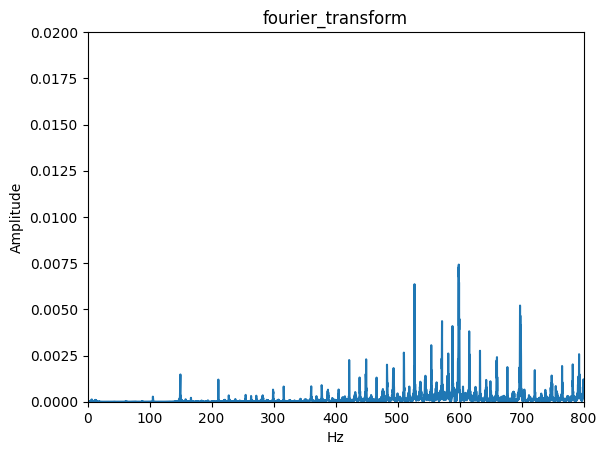

In [7]:
################################HEALTHY#################################
# Get healthy data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

healthy_x_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('healthy_xVibrationDataset.csv')
    m1=np.size(dataset,1)
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
healthy_x_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_x = fourier_transform(healthy_x_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_x = Hfeat_Vibration_x ** 2
# **計算總能量
total_energy_x = np.sum(energy_spectrum_x)

# Feature extraction for healthy data
Hamp_healthy_x_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_healthy_x_vibration[count1, 0] = np.sqrt(np.mean(healthy_x_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_healthy_x_vibration[count1, 1] = np.mean(healthy_x_VibrationDataset[:, count1]) # 2-mean
    Hamp_healthy_x_vibration[count1, 2] = kurtosis(healthy_x_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_healthy_x_vibration[count1, 3] = np.std(healthy_x_VibrationDataset[:, count1]) # 4-std
    Hamp_healthy_x_vibration[count1, 4] = skew(healthy_x_VibrationDataset[:, count1]) # 5-skewness
    Hamp_healthy_x_vibration[count1, 5] = np.max(healthy_x_VibrationDataset[:, count1]) - np.min(healthy_x_VibrationDataset[:, count1])  # 6-PeakToPeak
    Hamp_healthy_x_vibration[count1, 6] = np.max(np.abs(healthy_x_VibrationDataset[:, count1])) / Hamp_healthy_x_vibration[count1, 0] # 7-Crest Factor
    Hamp_healthy_x_vibration[count1, 7] = np.max(np.abs(healthy_x_VibrationDataset[:, count1])) / np.mean(np.abs(healthy_x_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_healthy_x_vibration[count1, 8] = Hamp_healthy_x_vibration[count1, 0] / np.mean(np.abs(healthy_x_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_healthy_x_vibration[count1, 9] = np.max(np.abs(healthy_x_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(healthy_x_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_healthy_x_vibration[count1, 10] = np.sum(np.abs(healthy_x_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    # 將每個頻率的能量正規化為概率分佈
    p_x = energy_spectrum_x[:, count1] / total_energy_x

    # 去除 p 中的零值以避免 log(0) 錯誤
    p_x = p_x[p_x > 0]

    # 計算熵
    entropy_x = -np.sum(p_x * np.log2(p_x))

    Hamp_healthy_x_vibration[count1, 11] = entropy_x
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_healthy_x_vibration[count1, 12] = max(Hfeat_Vibration_x[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_healthy_x_vibration[count1, 13] = max(Hfeat_Vibration_x[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_healthy_x_vibration[count1, 14] = max(Hfeat_Vibration_x[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_healthy_x_vibration[count1, 15] = max(Hfeat_Vibration_x[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_healthy_x_vibration[count1, 16] = max(Hfeat_Vibration_x[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_healthy_x_vibration[count1, 17] = max(Hfeat_Vibration_x[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_healthy_x_vibration[count1, 18] = max(Hfeat_Vibration_x[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_healthy_x_vibration[count1, 19] = max(Hfeat_Vibration_x[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#healthy_yVibrationDataset.csv

###Need change:
* healthy_x_VibrationDataset 改成 healthy_y_VibrationDataset

* healthy_xVibrationDataset.csv 改成 healthy_yVibrationDataset.csv

* Hamp_healthy_x_vibration 改成 Hamp_healthy_y_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_x 改成 Hfeat_Vibration_y

* energy_spectrum_x 改成 energy_spectrum_y

* total_energy_x 改成 total_energy_y

* p_x 改成 p_y

* entropy_x 改成 entropy_y

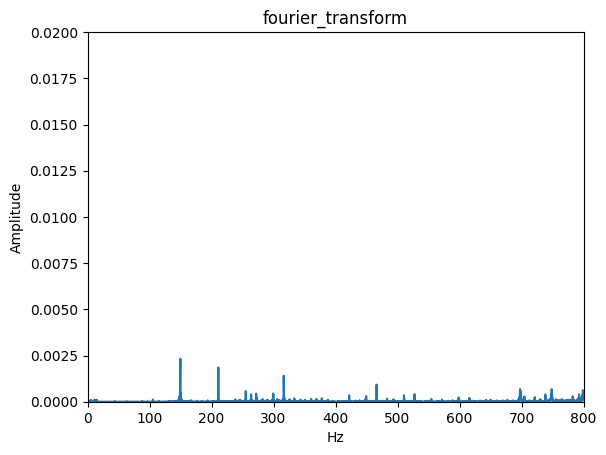

In [10]:
################################HEALTHY#################################
# Get healthy data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

healthy_y_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('healthy_yVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
healthy_y_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_y = fourier_transform(healthy_y_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_y = Hfeat_Vibration_y ** 2
# **計算總能量
total_energy_y = np.sum(energy_spectrum_y)

# Feature extraction for healthy data
Hamp_healthy_y_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_healthy_y_vibration[count1, 0] = np.sqrt(np.mean(healthy_y_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_healthy_y_vibration[count1, 1] = np.mean(healthy_y_VibrationDataset[:, count1]) # 2-mean
    Hamp_healthy_y_vibration[count1, 2] = kurtosis(healthy_y_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_healthy_y_vibration[count1, 3] = np.std(healthy_y_VibrationDataset[:, count1]) # 4-std
    Hamp_healthy_y_vibration[count1, 4] = skew(healthy_y_VibrationDataset[:, count1]) # 5-skewness
    Hamp_healthy_y_vibration[count1, 5] = np.max(healthy_y_VibrationDataset[:, count1]) - np.min(healthy_y_VibrationDataset[:, count1])  # 6-PeakToPeak
    Hamp_healthy_y_vibration[count1, 6] = np.max(np.abs(healthy_y_VibrationDataset[:, count1])) / Hamp_healthy_y_vibration[count1, 0] # 7-Crest Factor
    Hamp_healthy_y_vibration[count1, 7] = np.max(np.abs(healthy_y_VibrationDataset[:, count1])) / np.mean(np.abs(healthy_y_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_healthy_y_vibration[count1, 8] = Hamp_healthy_y_vibration[count1, 0] / np.mean(np.abs(healthy_y_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_healthy_y_vibration[count1, 9] = np.max(np.abs(healthy_y_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(healthy_y_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_healthy_y_vibration[count1, 10] = np.sum(np.abs(healthy_y_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    # 將每個頻率的能量正規化為概率分佈
    p_y = energy_spectrum_y[:, count1] / total_energy_y

    # 去除 p 中的零值以避免 log(0) 錯誤
    p_y = p_y[p_y > 0]

    # 計算熵
    entropy_y = -np.sum(p_y * np.log2(p_y))

    Hamp_healthy_y_vibration[count1, 11] = entropy_y
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_healthy_y_vibration[count1, 12] = max(Hfeat_Vibration_y[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_healthy_y_vibration[count1, 13] = max(Hfeat_Vibration_y[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_healthy_y_vibration[count1, 14] = max(Hfeat_Vibration_y[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_healthy_y_vibration[count1, 15] = max(Hfeat_Vibration_y[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_healthy_y_vibration[count1, 16] = max(Hfeat_Vibration_y[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_healthy_y_vibration[count1, 17] = max(Hfeat_Vibration_y[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_healthy_y_vibration[count1, 18] = max(Hfeat_Vibration_y[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_healthy_y_vibration[count1, 19] = max(Hfeat_Vibration_y[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#healthy_zVibrationDataset.csv

###Need change:
* healthy_y_VibrationDataset 改成 healthy_z_VibrationDataset

* healthy_yVibrationDataset.csv 改成 healthy_zVibrationDataset.csv

* Hamp_healthy_y_vibration 改成 Hamp_healthy_z_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_y 改成 Hfeat_Vibration_z

* energy_spectrum_y 改成 energy_spectrum_z

* total_energy_y 改成 total_energy_z

* p_y 改成 p_z

* entropy_y 改成 entropy_z

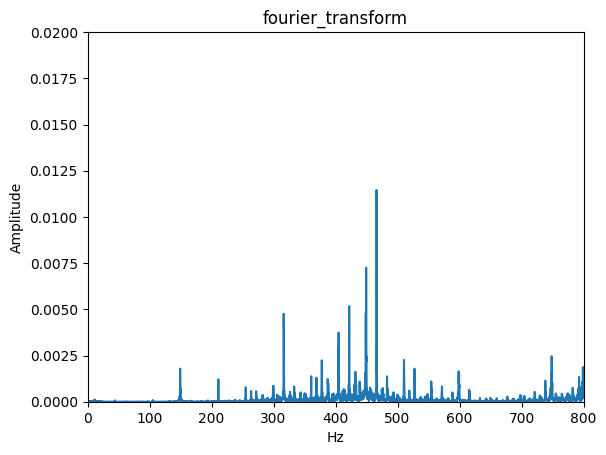

In [11]:
################################HEALTHY#################################
# Get healthy data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

healthy_z_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('healthy_zVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
healthy_z_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_z = fourier_transform(healthy_z_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_z = Hfeat_Vibration_z ** 2
# **計算總能量
total_energy_z = np.sum(energy_spectrum_z)

# Feature extraction for healthy data
Hamp_healthy_z_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_healthy_z_vibration[count1, 0] = np.sqrt(np.mean(healthy_z_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_healthy_z_vibration[count1, 1] = np.mean(healthy_z_VibrationDataset[:, count1]) # 2-mean
    Hamp_healthy_z_vibration[count1, 2] = kurtosis(healthy_z_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_healthy_z_vibration[count1, 3] = np.std(healthy_z_VibrationDataset[:, count1]) # 4-std
    Hamp_healthy_z_vibration[count1, 4] = skew(healthy_z_VibrationDataset[:, count1]) # 5-skewness
    Hamp_healthy_z_vibration[count1, 5] = np.max(healthy_z_VibrationDataset[:, count1]) - np.min(healthy_z_VibrationDataset[:, count1])  # 6-PeakToPeak
    Hamp_healthy_z_vibration[count1, 6] = np.max(np.abs(healthy_z_VibrationDataset[:, count1])) / Hamp_healthy_z_vibration[count1, 0] # 7-Crest Factor
    Hamp_healthy_z_vibration[count1, 7] = np.max(np.abs(healthy_z_VibrationDataset[:, count1])) / np.mean(np.abs(healthy_z_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_healthy_z_vibration[count1, 8] = Hamp_healthy_z_vibration[count1, 0] / np.mean(np.abs(healthy_z_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_healthy_z_vibration[count1, 9] = np.max(np.abs(healthy_z_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(healthy_z_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_healthy_z_vibration[count1, 10] = np.sum(np.abs(healthy_z_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    # 將每個頻率的能量正規化為概率分佈
    p_z = energy_spectrum_z[:, count1] / total_energy_z

    # 去除 p 中的零值以避免 log(0) 錯誤
    p_z = p_z[p_z > 0]

    # 計算熵
    entropy_z = -np.sum(p_z * np.log2(p_z))

    Hamp_healthy_z_vibration[count1, 11] = entropy_z
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_healthy_z_vibration[count1, 12] = max(Hfeat_Vibration_z[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_healthy_z_vibration[count1, 13] = max(Hfeat_Vibration_z[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_healthy_z_vibration[count1, 14] = max(Hfeat_Vibration_z[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_healthy_z_vibration[count1, 15] = max(Hfeat_Vibration_z[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_healthy_z_vibration[count1, 16] = max(Hfeat_Vibration_z[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_healthy_z_vibration[count1, 17] = max(Hfeat_Vibration_z[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_healthy_z_vibration[count1, 18] = max(Hfeat_Vibration_z[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_healthy_z_vibration[count1, 19] = max(Hfeat_Vibration_z[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#healthy_VoltageDataset.csv

###Need change:
* healthy_z_VibrationDataset 改成 healthy_VoltageDataset

* healthy_zVibrationDataset.csv 改成 healthy_VoltageDataset.csv

* Hamp_healthy_z_vibration 改成 Hamp_healthy_Voltage (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_z 改成 Hfeat_Voltage

* energy_spectrum_z 改成 energy_spectrum_Voltage

* total_energy_z 改成 total_energy_Voltage

* p_z 改成 p_Voltage

* entropy_z 改成 entropy_Voltage

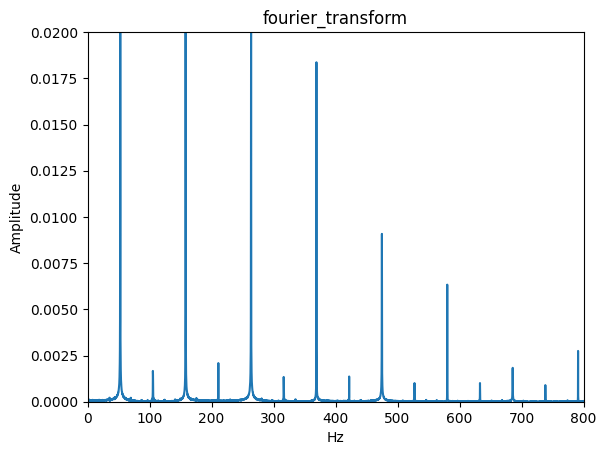

In [12]:
################################HEALTHY#################################
# Get healthy data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

healthy_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('healthy_VoltageDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
healthy_VoltageDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Voltage = fourier_transform(healthy_VoltageDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_Voltage = Hfeat_Voltage ** 2
# **計算總能量
total_energy_Voltage = np.sum(energy_spectrum_Voltage)

# Feature extraction for healthy data
Hamp_healthy_Voltage = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_healthy_Voltage[count1, 0] = np.sqrt(np.mean(healthy_VoltageDataset[:, count1] ** 2)) # 1-rms
    Hamp_healthy_Voltage[count1, 1] = np.mean(healthy_VoltageDataset[:, count1]) # 2-mean
    Hamp_healthy_Voltage[count1, 2] = kurtosis(healthy_VoltageDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_healthy_Voltage[count1, 3] = np.std(healthy_VoltageDataset[:, count1]) # 4-std
    Hamp_healthy_Voltage[count1, 4] = skew(healthy_VoltageDataset[:, count1]) # 5-skewness
    Hamp_healthy_Voltage[count1, 5] = np.max(healthy_VoltageDataset[:, count1]) - np.min(healthy_VoltageDataset[:, count1])  # 6-PeakToPeak
    Hamp_healthy_Voltage[count1, 6] = np.max(np.abs(healthy_VoltageDataset[:, count1])) / Hamp_healthy_Voltage[count1, 0] # 7-Crest Factor
    Hamp_healthy_Voltage[count1, 7] = np.max(np.abs(healthy_VoltageDataset[:, count1])) / np.mean(np.abs(healthy_VoltageDataset[:, count1])) # 8-Impulse Factor
    Hamp_healthy_Voltage[count1, 8] = Hamp_healthy_Voltage[count1, 0] / np.mean(np.abs(healthy_VoltageDataset[:, count1])) # 9-Shape Factor
    Hamp_healthy_Voltage[count1, 9] = np.max(np.abs(healthy_VoltageDataset[:, count1])) / (np.mean(np.sqrt(np.abs(healthy_VoltageDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_healthy_Voltage[count1, 10] = np.sum(np.abs(healthy_VoltageDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    # 將每個頻率的能量正規化為概率分佈
    p_Voltage = energy_spectrum_Voltage[:, count1] / total_energy_Voltage

    # 去除 p 中的零值以避免 log(0) 錯誤
    p_Voltage = p_Voltage[p_Voltage > 0]

    # 計算熵
    entropy_Voltage = -np.sum(p_Voltage * np.log2(p_Voltage))

    Hamp_healthy_Voltage[count1, 11] = entropy_Voltage
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_healthy_Voltage[count1, 12] = max(Hfeat_Voltage[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_healthy_Voltage[count1, 13] = max(Hfeat_Voltage[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_healthy_Voltage[count1, 14] = max(Hfeat_Voltage[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_healthy_Voltage[count1, 15] = max(Hfeat_Voltage[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_healthy_Voltage[count1, 16] = max(Hfeat_Voltage[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_healthy_Voltage[count1, 17] = max(Hfeat_Voltage[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_healthy_Voltage[count1, 18] = max(Hfeat_Voltage[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_healthy_Voltage[count1, 19] = max(Hfeat_Voltage[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


In [13]:
### healthy_allFeature
healthy_allFeature=np.zeros((m1,len1*4)) # x-axis vibration + y-axis vibration + voltage = 30 features
healthy_allFeature[:,0:len1] = Hamp_healthy_x_vibration[:,0:len1]
healthy_allFeature[:,len1:len1*2] = Hamp_healthy_y_vibration[:,0:len1]
healthy_allFeature[:,len1*2:len1*3] = Hamp_healthy_z_vibration[:,0:len1]
healthy_allFeature[:,len1*3:len1*4] = Hamp_healthy_Voltage[:,0:len1]
# save healthy features
os.chdir(featureDirectory) # Change directory to feature file directory
with open('featureHealthy.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(feature_name)
  writer.writerows(healthy_allFeature)

In [ ]:
# 儲存健康特徵
os.chdir(featureDirectory)  # 切換到特徵檔案目錄

# 將各個特徵矩陣以列的方向合併為一個矩陣
combined_features = np.hstack([
    Hamp_healthy_x_vibration,
    Hamp_healthy_y_vibration,
    Hamp_healthy_z_vibration,
    Hamp_healthy_Voltage
])

# 確認合併後的矩陣維度為 48x80
assert combined_features.shape == (48, 80), "合併後的矩陣形狀為 48x80。"

# 將合併後的特徵寫入 CSV 檔案
with open('featureHealthy.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(feature_name)  # 寫入標頭
    writer.writerows(combined_features)    # 寫入所有合併後的特徵列

print("特徵檔案 'featureHealthy.csv' 已成功建立")


特徵檔案 'featureHealthy.csv' 已成功建立


#----------------------------------------    Faulty1 ----------------------------------------

#faulty1_xVibrationDataset.csv

###Need change:
* faultyVibrationDataset 改成 faulty1_x_VibrationDataset

* faultyVibrationSignal.csv 改成 faulty1_xVibrationDataset.csv

* Hamp_faulty_vibration 改成 Hamp_faulty1_x_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration 改成 Hfeat_Vibration_faulty1_x

* energy_spectrum 改成 energy_spectrum_faulty1_x

* total_energy 改成 total_energy_faulty1_x

* p 改成 p_faulty1_x

* entropy 改成 entropy_faulty1_x

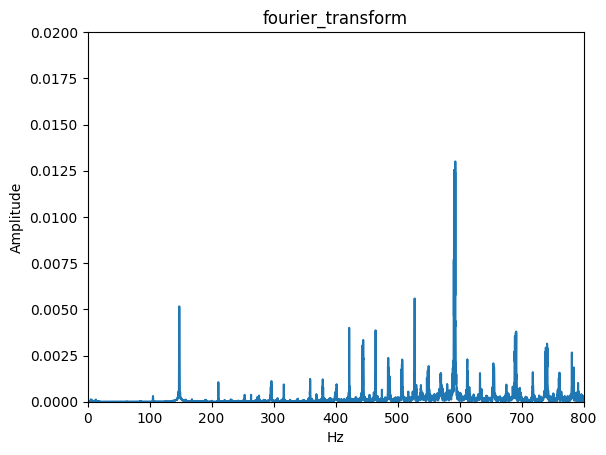

In [14]:
#################################FAULTY1#################################
# Get faulty1_x data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty1_x_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty1_xVibrationDataset.csv')
    m2=np.size(dataset,1)
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty1_x_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_faulty1_x = fourier_transform(faulty1_x_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_faulty1_x = Hfeat_Vibration_faulty1_x ** 2
# **計算總能量
total_energy_faulty1_x = np.sum(energy_spectrum_faulty1_x)

# Feature extraction for faulty1_x data
Hamp_faulty1_x_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty1_x_vibration[count1, 0] = np.sqrt(np.mean(faulty1_x_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty1_x_vibration[count1, 1] = np.mean(faulty1_x_VibrationDataset[:, count1]) # 2-mean
    Hamp_faulty1_x_vibration[count1, 2] = kurtosis(faulty1_x_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty1_x_vibration[count1, 3] = np.std(faulty1_x_VibrationDataset[:, count1]) # 4-std
    Hamp_faulty1_x_vibration[count1, 4] = skew(faulty1_x_VibrationDataset[:, count1]) # 5-skewness
    Hamp_faulty1_x_vibration[count1, 5] = np.max(faulty1_x_VibrationDataset[:, count1]) - np.min(faulty1_x_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty1_x_vibration[count1, 6] = np.max(np.abs(faulty1_x_VibrationDataset[:, count1])) / Hamp_faulty1_x_vibration[count1, 0] # 7-Crest Factor
    Hamp_faulty1_x_vibration[count1, 7] = np.max(np.abs(faulty1_x_VibrationDataset[:, count1])) / np.mean(np.abs(faulty1_x_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty1_x_vibration[count1, 8] = Hamp_faulty1_x_vibration[count1, 0] / np.mean(np.abs(faulty1_x_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty1_x_vibration[count1, 9] = np.max(np.abs(faulty1_x_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty1_x_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty1_x_vibration[count1, 10] = np.sum(np.abs(faulty1_x_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_faulty1_x = energy_spectrum_faulty1_x[:, count1] / total_energy_faulty1_x
    p_faulty1_x = p_faulty1_x[p_faulty1_x > 0]
    entropy_faulty1_x = -np.sum(p_faulty1_x * np.log2(p_faulty1_x))
    Hamp_faulty1_x_vibration[count1, 11] = entropy_faulty1_x
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty1_x_vibration[count1, 12] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty1_x_vibration[count1, 13] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty1_x_vibration[count1, 14] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty1_x_vibration[count1, 15] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty1_x_vibration[count1, 16] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty1_x_vibration[count1, 17] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty1_x_vibration[count1, 18] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty1_x_vibration[count1, 19] = max(Hfeat_Vibration_faulty1_x[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#faulty1_yVibrationDataset.csv

###Need change:
* faulty1_x_VibrationDataset 改成 faulty1_y_VibrationDataset

* faulty1_xVibrationDataset.csv 改成 faulty1_yVibrationDataset.csv

*  Hamp_faulty1_x_vibration 改成 Hamp_faulty1_y_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_faulty1_x 改成 Hfeat_Vibration_faulty1_y

* energy_spectrum_faulty1_x 改成 energy_spectrum_faulty1_y

* total_energy_faulty1_x 改成 total_energy_faulty1_y

* p_faulty1_x 改成 p_faulty1_y

* entropy_faulty1_x 改成 entropy_faulty1_y

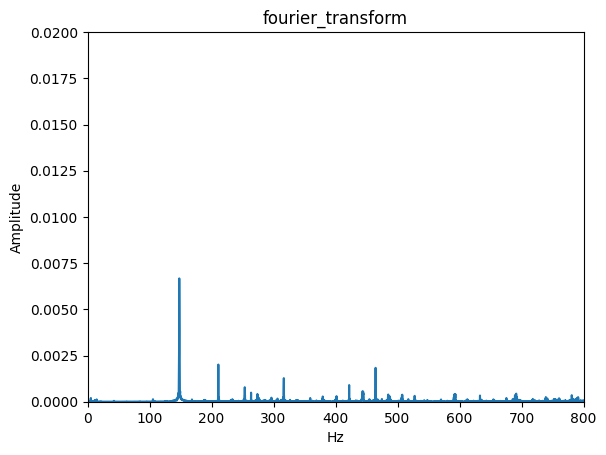

In [15]:
#################################FAULTY1#################################
# Get faulty1_y data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty1_y_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty1_yVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty1_y_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_faulty1_y = fourier_transform(faulty1_y_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_faulty1_y = Hfeat_Vibration_faulty1_y ** 2
# **計算總能量
total_energy_faulty1_y = np.sum(energy_spectrum_faulty1_y)

# Feature extraction for faulty1_y data
Hamp_faulty1_y_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty1_y_vibration[count1, 0] = np.sqrt(np.mean(faulty1_y_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty1_y_vibration[count1, 1] = np.mean(faulty1_y_VibrationDataset[:, count1]) # 2-mean
    Hamp_faulty1_y_vibration[count1, 2] = kurtosis(faulty1_y_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty1_y_vibration[count1, 3] = np.std(faulty1_y_VibrationDataset[:, count1]) # 4-std
    Hamp_faulty1_y_vibration[count1, 4] = skew(faulty1_y_VibrationDataset[:, count1]) # 5-skewness
    Hamp_faulty1_y_vibration[count1, 5] = np.max(faulty1_y_VibrationDataset[:, count1]) - np.min(faulty1_y_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty1_y_vibration[count1, 6] = np.max(np.abs(faulty1_y_VibrationDataset[:, count1])) / Hamp_faulty1_y_vibration[count1, 0] # 7-Crest Factor
    Hamp_faulty1_y_vibration[count1, 7] = np.max(np.abs(faulty1_y_VibrationDataset[:, count1])) / np.mean(np.abs(faulty1_y_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty1_y_vibration[count1, 8] = Hamp_faulty1_y_vibration[count1, 0] / np.mean(np.abs(faulty1_y_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty1_y_vibration[count1, 9] = np.max(np.abs(faulty1_y_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty1_y_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty1_y_vibration[count1, 10] = np.sum(np.abs(faulty1_y_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_faulty1_y = energy_spectrum_faulty1_y[:, count1] / total_energy_faulty1_y
    p_faulty1_y = p_faulty1_y[p_faulty1_y > 0]
    entropy_faulty1_y = -np.sum(p_faulty1_y * np.log2(p_faulty1_y))
    Hamp_faulty1_y_vibration[count1, 11] = entropy_faulty1_y
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty1_y_vibration[count1, 12] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty1_y_vibration[count1, 13] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty1_y_vibration[count1, 14] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty1_y_vibration[count1, 15] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty1_y_vibration[count1, 16] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty1_y_vibration[count1, 17] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty1_y_vibration[count1, 18] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty1_y_vibration[count1, 19] = max(Hfeat_Vibration_faulty1_y[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#faulty1_zVibrationDataset.csv

###Need change:
* faulty1_y_VibrationDataset 改成 faulty1_z_VibrationDataset

* faulty1_yVibrationDataset.csv 改成 faulty1_zVibrationDataset.csv

*  Hamp_faulty1_y_vibration 改成 Hamp_faulty1_z_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_faulty1_y 改成 Hfeat_Vibration_faulty1_z

* energy_spectrum_faulty1_y 改成 energy_spectrum_faulty1_z

* total_energy_faulty1_y 改成 total_energy_faulty1_z

* p_faulty1_y 改成 p_faulty1_z

* entropy_faulty1_y 改成 entropy_faulty1_z

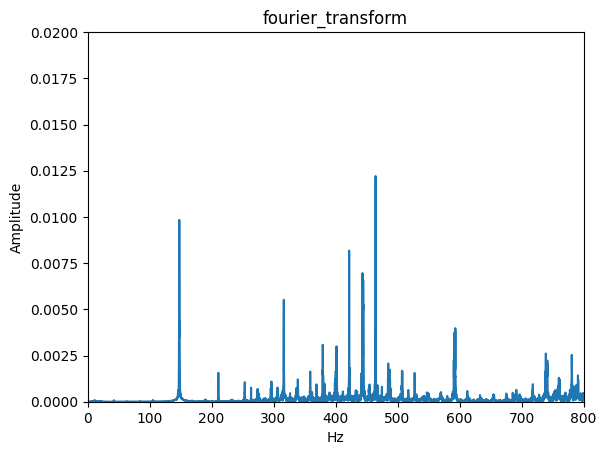

In [16]:
#################################FAULTY1#################################
# Get faulty1_z data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty1_z_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty1_zVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty1_z_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_faulty1_z = fourier_transform(faulty1_z_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_faulty1_z = Hfeat_Vibration_faulty1_z ** 2
# **計算總能量
total_energy_faulty1_z = np.sum(energy_spectrum_faulty1_z)

# Feature extraction for faulty1_z data
Hamp_faulty1_z_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty1_z_vibration[count1, 0] = np.sqrt(np.mean(faulty1_z_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty1_z_vibration[count1, 1] = np.mean(faulty1_z_VibrationDataset[:, count1]) # 2-mean
    Hamp_faulty1_z_vibration[count1, 2] = kurtosis(faulty1_z_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty1_z_vibration[count1, 3] = np.std(faulty1_z_VibrationDataset[:, count1]) # 4-std
    Hamp_faulty1_z_vibration[count1, 4] = skew(faulty1_z_VibrationDataset[:, count1]) # 5-skewness
    Hamp_faulty1_z_vibration[count1, 5] = np.max(faulty1_z_VibrationDataset[:, count1]) - np.min(faulty1_z_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty1_z_vibration[count1, 6] = np.max(np.abs(faulty1_z_VibrationDataset[:, count1])) / Hamp_faulty1_z_vibration[count1, 0] # 7-Crest Factor
    Hamp_faulty1_z_vibration[count1, 7] = np.max(np.abs(faulty1_z_VibrationDataset[:, count1])) / np.mean(np.abs(faulty1_z_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty1_z_vibration[count1, 8] = Hamp_faulty1_z_vibration[count1, 0] / np.mean(np.abs(faulty1_z_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty1_z_vibration[count1, 9] = np.max(np.abs(faulty1_z_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty1_z_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty1_z_vibration[count1, 10] = np.sum(np.abs(faulty1_z_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_faulty1_z = energy_spectrum_faulty1_z[:, count1] / total_energy_faulty1_z
    p_faulty1_z = p_faulty1_z[p_faulty1_z > 0]
    entropy_faulty1_z = -np.sum(p_faulty1_z * np.log2(p_faulty1_z))
    Hamp_faulty1_z_vibration[count1, 11] = entropy_faulty1_z
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty1_z_vibration[count1, 12] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty1_z_vibration[count1, 13] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty1_z_vibration[count1, 14] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty1_z_vibration[count1, 15] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty1_z_vibration[count1, 16] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty1_z_vibration[count1, 17] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty1_z_vibration[count1, 18] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty1_z_vibration[count1, 19] = max(Hfeat_Vibration_faulty1_z[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#faulty1_VoltageDataset.csv

###Need change:
* faulty1_z_VibrationDataset 改成 faulty1_VoltageDataset

* faulty1_zVibrationDataset.csv 改成 faulty1_VoltageDataset.csv

*  Hamp_faulty1_z_vibration 改成 Hamp_faulty1_Voltage (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_faulty1_z 改成 Hfeat_Voltage_faulty1

* energy_spectrum_faulty1_z 改energy_spectrum_Voltage_faulty1

* total_energy_faulty1_z 改成 total_energy_Voltage_faulty1

* p_faulty1_z 改成 p_Voltage_faulty1

* entropy_faulty1_z 改成 entropy_Voltage_faulty1

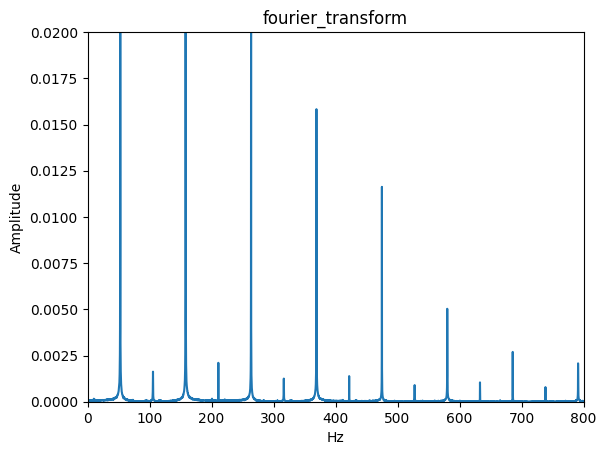

In [17]:
#################################FAULTY1#################################
# Get faulty1_Voltage data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty1_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty1_VoltageDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty1_VoltageDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Voltage_faulty1 = fourier_transform(faulty1_VoltageDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_Voltage_faulty1 = Hfeat_Voltage_faulty1 ** 2
# **計算總能量
total_energy_Voltage_faulty1 = np.sum(energy_spectrum_Voltage_faulty1)

# Feature extraction for faulty1_Voltage data
Hamp_faulty1_Voltage = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty1_Voltage[count1, 0] = np.sqrt(np.mean(faulty1_VoltageDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty1_Voltage[count1, 1] = np.mean(faulty1_VoltageDataset[:, count1]) # 2-mean
    Hamp_faulty1_Voltage[count1, 2] = kurtosis(faulty1_VoltageDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty1_Voltage[count1, 3] = np.std(faulty1_VoltageDataset[:, count1]) # 4-std
    Hamp_faulty1_Voltage[count1, 4] = skew(faulty1_VoltageDataset[:, count1]) # 5-skewness
    Hamp_faulty1_Voltage[count1, 5] = np.max(faulty1_VoltageDataset[:, count1]) - np.min(faulty1_VoltageDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty1_Voltage[count1, 6] = np.max(np.abs(faulty1_VoltageDataset[:, count1])) / Hamp_faulty1_Voltage[count1, 0] # 7-Crest Factor
    Hamp_faulty1_Voltage[count1, 7] = np.max(np.abs(faulty1_VoltageDataset[:, count1])) / np.mean(np.abs(faulty1_VoltageDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty1_Voltage[count1, 8] = Hamp_faulty1_Voltage[count1, 0] / np.mean(np.abs(faulty1_VoltageDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty1_Voltage[count1, 9] = np.max(np.abs(faulty1_VoltageDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty1_VoltageDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty1_Voltage[count1, 10] = np.sum(np.abs(faulty1_VoltageDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_Voltage_faulty1 = energy_spectrum_Voltage_faulty1[:, count1] / total_energy_Voltage_faulty1
    p_Voltage_faulty1 = p_Voltage_faulty1[p_Voltage_faulty1 > 0]
    entropy_Voltage_faulty1 = -np.sum(p_Voltage_faulty1 * np.log2(p_Voltage_faulty1))
    Hamp_faulty1_Voltage[count1, 11] = entropy_Voltage_faulty1
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty1_Voltage[count1, 12] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty1_Voltage[count1, 13] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty1_Voltage[count1, 14] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty1_Voltage[count1, 15] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty1_Voltage[count1, 16] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty1_Voltage[count1, 17] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty1_Voltage[count1, 18] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty1_Voltage[count1, 19] = max(Hfeat_Voltage_faulty1[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


In [21]:
### faulty_allFeature
faulty1_allFeature=np.zeros((m2,len1*4)) # x-axis vibration + y-axis vibration + voltage = 30 features
faulty1_allFeature[:,0:len1] = Hamp_faulty1_x_vibration[:,0:len1]
faulty1_allFeature[:,len1:len1*2] = Hamp_faulty1_y_vibration[:,0:len1]
faulty1_allFeature[:,len1*2:len1*3] = Hamp_faulty1_z_vibration[:,0:len1]
faulty1_allFeature[:,len1*3:len1*4] = Hamp_faulty1_Voltage[:,0:len1]
# save healthy features
os.chdir(featureDirectory) # Change directory to feature file directory
with open('featureFaulty1.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(feature_name)
  writer.writerows(faulty1_allFeature)

In [18]:
# 儲存Faulty1特徵
os.chdir(featureDirectory)  # 切換到特徵檔案目錄

# 將各個特徵矩陣以列的方向合併為一個矩陣
combined_features = np.hstack([
    Hamp_faulty1_x_vibration,
    Hamp_faulty1_y_vibration,
    Hamp_faulty1_z_vibration,
    Hamp_faulty1_Voltage
])

# 確認合併後的矩陣維度為 48x80
assert combined_features.shape == (48, 80), "合併後的矩陣形狀為 48x80。"

# 將合併後的特徵寫入 CSV 檔案
with open('featureFaulty1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(feature_name)  # 寫入標頭
    writer.writerows(combined_features)    # 寫入所有合併後的特徵列

print("特徵檔案 'featureFaulty1.csv' 已成功建立")

特徵檔案 'featureFaulty1.csv' 已成功建立


#----------------------------------------    Faulty2 ----------------------------------------

#faulty2_xVibrationDataset.csv

###Need change:
* faulty1_x_VibrationDataset 改成 faulty2_x_VibrationDataset

* faulty1_xVibrationDataset.csv 改成 faulty2_xVibrationDataset.csv

* Hamp_faulty1_x_vibration 改成 Hamp_faulty2_x_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_faulty1_x 改成 Hfeat_Vibration_faulty2_x

* energy_spectrum_faulty1_x 改成 energy_spectrum_faulty2_x

* total_energy_faulty1_x 改成 total_energy_faulty2_x

* p_faulty1_x 改成 p_faulty2_x

* entropy_faulty1_x 改成 entropy_faulty2_x

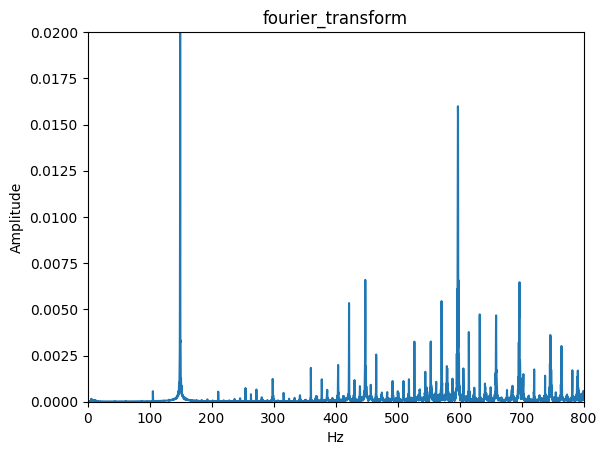

In [22]:
#################################FAULTY2#################################
# Get faulty2_x data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty2_x_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty2_xVibrationDataset.csv')
    m3=np.size(dataset,1) # m3=Faulty2 data file number
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty2_x_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_faulty2_x = fourier_transform(faulty2_x_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_faulty2_x = Hfeat_Vibration_faulty2_x ** 2
# **計算總能量
total_energy_faulty2_x = np.sum(energy_spectrum_faulty2_x)

# Feature extraction for faulty2_x data
Hamp_faulty2_x_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty2_x_vibration[count1, 0] = np.sqrt(np.mean(faulty2_x_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty2_x_vibration[count1, 1] = np.mean(faulty2_x_VibrationDataset[:, count1]) # 2-mean
    Hamp_faulty2_x_vibration[count1, 2] = kurtosis(faulty2_x_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty2_x_vibration[count1, 3] = np.std(faulty2_x_VibrationDataset[:, count1]) # 4-std
    Hamp_faulty2_x_vibration[count1, 4] = skew(faulty2_x_VibrationDataset[:, count1]) # 5-skewness
    Hamp_faulty2_x_vibration[count1, 5] = np.max(faulty2_x_VibrationDataset[:, count1]) - np.min(faulty2_x_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty2_x_vibration[count1, 6] = np.max(np.abs(faulty2_x_VibrationDataset[:, count1])) / Hamp_faulty2_x_vibration[count1, 0] # 7-Crest Factor
    Hamp_faulty2_x_vibration[count1, 7] = np.max(np.abs(faulty2_x_VibrationDataset[:, count1])) / np.mean(np.abs(faulty2_x_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty2_x_vibration[count1, 8] = Hamp_faulty2_x_vibration[count1, 0] / np.mean(np.abs(faulty2_x_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty2_x_vibration[count1, 9] = np.max(np.abs(faulty2_x_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty2_x_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty2_x_vibration[count1, 10] = np.sum(np.abs(faulty2_x_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_faulty2_x = energy_spectrum_faulty2_x[:, count1] / total_energy_faulty2_x
    p_faulty2_x = p_faulty2_x[p_faulty2_x > 0]
    entropy_faulty2_x = -np.sum(p_faulty2_x * np.log2(p_faulty2_x))
    Hamp_faulty2_x_vibration[count1, 11] = entropy_faulty2_x
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty2_x_vibration[count1, 12] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty2_x_vibration[count1, 13] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty2_x_vibration[count1, 14] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty2_x_vibration[count1, 15] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty2_x_vibration[count1, 16] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty2_x_vibration[count1, 17] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty2_x_vibration[count1, 18] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty2_x_vibration[count1, 19] = max(Hfeat_Vibration_faulty2_x[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#faulty2_yVibrationDataset.csv

###Need change:
* faulty2_x_VibrationDataset 改成 faulty2_y_VibrationDataset

* faulty2_xVibrationDataset.csv 改成 faulty2_yVibrationDataset.csv

* Hamp_faulty2_x_vibration 改成 Hamp_faulty2_y_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_faulty2_x 改成 Hfeat_Vibration_faulty2_y

* energy_spectrum_faulty2_x 改成 energy_spectrum_faulty2_y

* total_energy_faulty2_x 改成 total_energy_faulty2_y

* p_faulty2_x 改成 p_faulty2_y

* entropy_faulty2_x 改成 entropy_faulty2_y

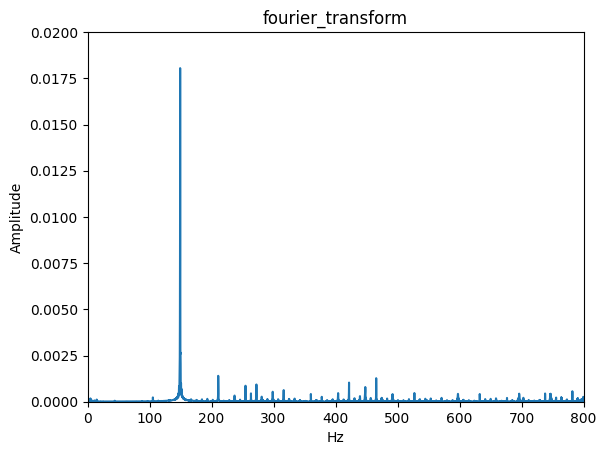

In [23]:
#################################FAULTY2#################################
# Get faulty2_y data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty2_y_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty2_yVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty2_y_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_faulty2_y = fourier_transform(faulty2_y_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_faulty2_y = Hfeat_Vibration_faulty2_y ** 2
# **計算總能量
total_energy_faulty2_y = np.sum(energy_spectrum_faulty2_y)

# Feature extraction for faulty2_y data
Hamp_faulty2_y_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty2_y_vibration[count1, 0] = np.sqrt(np.mean(faulty2_y_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty2_y_vibration[count1, 1] = np.mean(faulty2_y_VibrationDataset[:, count1]) # 2-mean
    Hamp_faulty2_y_vibration[count1, 2] = kurtosis(faulty2_y_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty2_y_vibration[count1, 3] = np.std(faulty2_y_VibrationDataset[:, count1]) # 4-std
    Hamp_faulty2_y_vibration[count1, 4] = skew(faulty2_y_VibrationDataset[:, count1]) # 5-skewness
    Hamp_faulty2_y_vibration[count1, 5] = np.max(faulty2_y_VibrationDataset[:, count1]) - np.min(faulty2_y_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty2_y_vibration[count1, 6] = np.max(np.abs(faulty2_y_VibrationDataset[:, count1])) / Hamp_faulty2_y_vibration[count1, 0] # 7-Crest Factor
    Hamp_faulty2_y_vibration[count1, 7] = np.max(np.abs(faulty2_y_VibrationDataset[:, count1])) / np.mean(np.abs(faulty2_y_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty2_y_vibration[count1, 8] = Hamp_faulty2_y_vibration[count1, 0] / np.mean(np.abs(faulty2_y_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty2_y_vibration[count1, 9] = np.max(np.abs(faulty2_y_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty2_y_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty2_y_vibration[count1, 10] = np.sum(np.abs(faulty2_y_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_faulty2_y = energy_spectrum_faulty2_y[:, count1] / total_energy_faulty2_y
    p_faulty2_y = p_faulty2_y[p_faulty2_y > 0]
    entropy_faulty2_y = -np.sum(p_faulty2_y * np.log2(p_faulty2_y))
    Hamp_faulty2_y_vibration[count1, 11] = entropy_faulty2_y
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty2_y_vibration[count1, 12] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty2_y_vibration[count1, 13] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty2_y_vibration[count1, 14] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty2_y_vibration[count1, 15] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty2_y_vibration[count1, 16] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty2_y_vibration[count1, 17] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty2_y_vibration[count1, 18] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty2_y_vibration[count1, 19] = max(Hfeat_Vibration_faulty2_y[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#faulty2_zVibrationDataset.csv

###Need change:
* faulty2_y_VibrationDataset 改成 faulty2_z_VibrationDataset

* faulty2_yVibrationDataset.csv 改成 faulty2_zVibrationDataset.csv

* Hamp_faulty2_y_vibration 改成 Hamp_faulty2_z_vibration (用於儲存20個特徵的 numpy array)

* Hfeat_Vibration_faulty2_y 改成 Hfeat_Vibration_faulty2_z

* energy_spectrum_faulty2_y 改成 energy_spectrum_faulty2_z

* total_energy_faulty2_y 改成 total_energy_faulty2_z

* p_faulty2_y 改成 p_faulty2_z

* entropy_faulty2_y 改成 entropy_faulty2_z

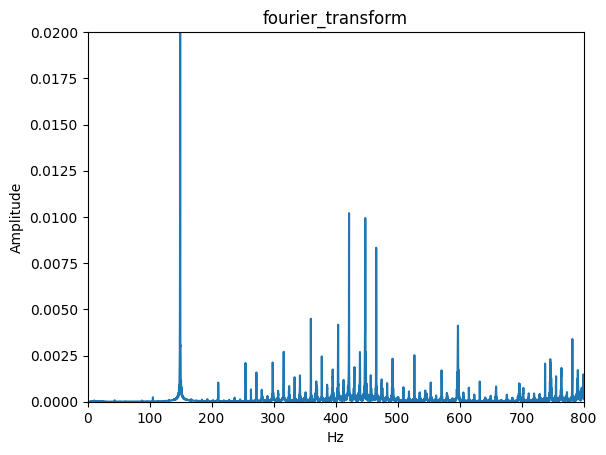

In [24]:
#################################FAULTY2#################################
# Get faulty2_z data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty2_z_VibrationDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty2_zVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty2_z_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_faulty2_z = fourier_transform(faulty2_z_VibrationDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_faulty2_z = Hfeat_Vibration_faulty2_z ** 2
# **計算總能量
total_energy_faulty2_z = np.sum(energy_spectrum_faulty2_z)

# Feature extraction for faulty2_z data
Hamp_faulty2_z_vibration = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty2_z_vibration[count1, 0] = np.sqrt(np.mean(faulty2_z_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty2_z_vibration[count1, 1] = np.mean(faulty2_z_VibrationDataset[:, count1]) # 2-mean
    Hamp_faulty2_z_vibration[count1, 2] = kurtosis(faulty2_z_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty2_z_vibration[count1, 3] = np.std(faulty2_z_VibrationDataset[:, count1]) # 4-std
    Hamp_faulty2_z_vibration[count1, 4] = skew(faulty2_z_VibrationDataset[:, count1]) # 5-skewness
    Hamp_faulty2_z_vibration[count1, 5] = np.max(faulty2_z_VibrationDataset[:, count1]) - np.min(faulty2_z_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty2_z_vibration[count1, 6] = np.max(np.abs(faulty2_z_VibrationDataset[:, count1])) / Hamp_faulty2_z_vibration[count1, 0] # 7-Crest Factor
    Hamp_faulty2_z_vibration[count1, 7] = np.max(np.abs(faulty2_z_VibrationDataset[:, count1])) / np.mean(np.abs(faulty2_z_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty2_z_vibration[count1, 8] = Hamp_faulty2_z_vibration[count1, 0] / np.mean(np.abs(faulty2_z_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty2_z_vibration[count1, 9] = np.max(np.abs(faulty2_z_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty2_z_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty2_z_vibration[count1, 10] = np.sum(np.abs(faulty2_z_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_faulty2_z = energy_spectrum_faulty2_z[:, count1] / total_energy_faulty2_z
    p_faulty2_z = p_faulty2_z[p_faulty2_z > 0]
    entropy_faulty2_z = -np.sum(p_faulty2_z * np.log2(p_faulty2_z))
    Hamp_faulty2_z_vibration[count1, 11] = entropy_faulty2_z
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty2_z_vibration[count1, 12] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty2_z_vibration[count1, 13] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty2_z_vibration[count1, 14] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty2_z_vibration[count1, 15] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty2_z_vibration[count1, 16] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty2_z_vibration[count1, 17] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty2_z_vibration[count1, 18] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty2_z_vibration[count1, 19] = max(Hfeat_Vibration_faulty2_z[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#faulty2_VoltageDataset.csv

###Need change:
* faulty1_VoltageDataset 改成 faulty2_VoltageDataset

* faulty1_VoltageDataset.csv 改成 faulty2_VoltageDataset.csv

*  Hamp_faulty1_Voltage 改成 Hamp_faulty2_Voltage (用於儲存20個特徵的 numpy array)

* Hfeat_Voltage_faulty1 改成 Hfeat_Voltage_faulty2

* energy_spectrum_Voltage_faulty1 改成 energy_spectrum_Voltage_faulty2

* total_energy_Voltage_faulty1 改成 total_energy_Voltage_faulty2

* p_Voltage_faulty1 改成 p_Voltage_faulty2

* entropy_Voltage_faulty1 改成 entropy_Voltage_faulty2

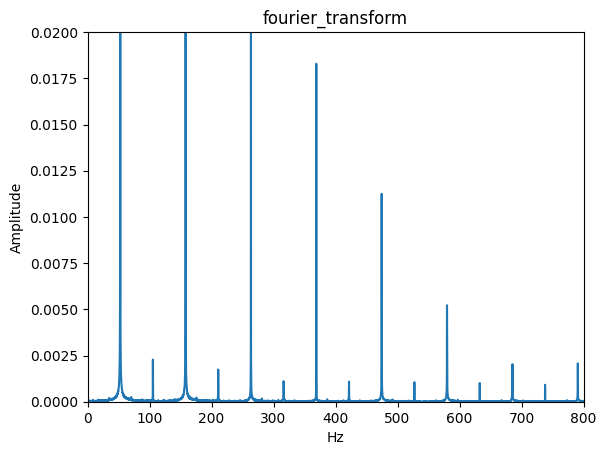

In [25]:
#################################FAULTY2#################################
# Get faulty2_Voltage data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

faulty2_VoltageDataset = np.zeros((rawdata, m), dtype=np.double)

try:
    dataset = pd.read_csv('faulty2_VoltageDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
faulty2_VoltageDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Voltage_faulty2 = fourier_transform(faulty2_VoltageDataset, m)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_Voltage_faulty2 = Hfeat_Voltage_faulty2 ** 2
# **計算總能量
total_energy_Voltage_faulty2 = np.sum(energy_spectrum_Voltage_faulty2)

# Feature extraction for faulty2_Voltage data
Hamp_faulty2_Voltage = np.zeros((m, len1))

for count1 in range(48): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_faulty2_Voltage[count1, 0] = np.sqrt(np.mean(faulty2_VoltageDataset[:, count1] ** 2)) # 1-rms
    Hamp_faulty2_Voltage[count1, 1] = np.mean(faulty2_VoltageDataset[:, count1]) # 2-mean
    Hamp_faulty2_Voltage[count1, 2] = kurtosis(faulty2_VoltageDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_faulty2_Voltage[count1, 3] = np.std(faulty2_VoltageDataset[:, count1]) # 4-std
    Hamp_faulty2_Voltage[count1, 4] = skew(faulty2_VoltageDataset[:, count1]) # 5-skewness
    Hamp_faulty2_Voltage[count1, 5] = np.max(faulty2_VoltageDataset[:, count1]) - np.min(faulty2_VoltageDataset[:, count1]) # 6-PeakToPeak
    Hamp_faulty2_Voltage[count1, 6] = np.max(np.abs(faulty2_VoltageDataset[:, count1])) / Hamp_faulty2_Voltage[count1, 0] # 7-Crest Factor
    Hamp_faulty2_Voltage[count1, 7] = np.max(np.abs(faulty2_VoltageDataset[:, count1])) / np.mean(np.abs(faulty2_VoltageDataset[:, count1])) # 8-Impulse Factor
    Hamp_faulty2_Voltage[count1, 8] = Hamp_faulty2_Voltage[count1, 0] / np.mean(np.abs(faulty2_VoltageDataset[:, count1])) # 9-Shape Factor
    Hamp_faulty2_Voltage[count1, 9] = np.max(np.abs(faulty2_VoltageDataset[:, count1])) / (np.mean(np.sqrt(np.abs(faulty2_VoltageDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_faulty2_Voltage[count1, 10] = np.sum(np.abs(faulty2_VoltageDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_Voltage_faulty2 = energy_spectrum_Voltage_faulty2[:, count1] / total_energy_Voltage_faulty2
    p_Voltage_faulty2 = p_Voltage_faulty2[p_Voltage_faulty2 > 0]
    entropy_Voltage_faulty2 = -np.sum(p_Voltage_faulty2 * np.log2(p_Voltage_faulty2))
    Hamp_faulty2_Voltage[count1, 11] = entropy_Voltage_faulty2
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_faulty2_Voltage[count1, 12] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_faulty2_Voltage[count1, 13] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_faulty2_Voltage[count1, 14] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_faulty2_Voltage[count1, 15] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_faulty2_Voltage[count1, 16] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_faulty2_Voltage[count1, 17] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_faulty2_Voltage[count1, 18] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_faulty2_Voltage[count1, 19] = max(Hfeat_Voltage_faulty2[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


In [27]:
### faulty2_allFeature
faulty2_allFeature=np.zeros((m3,len1*4)) # x-axis vibration + y-axis vibration + voltage = 30 features
faulty2_allFeature[:,0:len1] = Hamp_faulty2_x_vibration[:,0:len1]
faulty2_allFeature[:,len1:len1*2] = Hamp_faulty2_y_vibration[:,0:len1]
faulty2_allFeature[:,len1*2:len1*3] = Hamp_faulty2_z_vibration[:,0:len1]
faulty2_allFeature[:,len1*3:len1*4] = Hamp_faulty2_Voltage[:,0:len1]
# save healthy features
os.chdir(featureDirectory) # Change directory to feature file directory
with open('featureFaulty2.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(feature_name)
  writer.writerows(faulty2_allFeature)

In [ ]:
# 儲存Faulty2特徵
os.chdir(featureDirectory)  # 切換到特徵檔案目錄

# 將各個特徵矩陣以列的方向合併為一個矩陣
combined_features = np.hstack([
    Hamp_faulty2_x_vibration,
    Hamp_faulty2_y_vibration,
    Hamp_faulty2_z_vibration,
    Hamp_faulty2_Voltage
])

# 確認合併後的矩陣維度為 48x80
assert combined_features.shape == (48, 80), "合併後的矩陣形狀為 48x80。"

# 將合併後的特徵寫入 CSV 檔案
with open('featureFaulty2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(feature_name)  # 寫入標頭
    writer.writerows(combined_features)    # 寫入所有合併後的特徵列

print("特徵檔案 'featureFaulty2.csv' 已成功建立")

特徵檔案 'featureFaulty2.csv' 已成功建立


#--------------------------- Testing ---------------------  


#testing_xVibrationDataset.csv

###Need change:
* testingVibrationDataset 改成 testing_x_VibrationDataset
* testingVibrationSignal.csv 改成 testing_xVibrationDataset.csv
* Hfeat_Vibration 改成 Hfeat_Vibration_testing_x
* energy_spectrum  改成 energy_spectrum_testing_x
* total_energy 改成 total_energy_testing_x
* Hamp_testing_vibration 改成 Hamp_testin_x_vibration
* p 改成 p_testing_x
* entropy 改成 entropy_testing_x

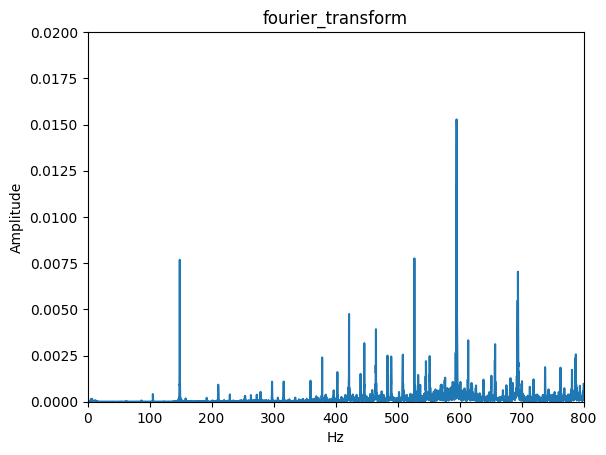

In [28]:
#################################TESTING#################################
# Get testing_x data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

#testing_x_VibrationDataset = np.zeros((rawdata, m2), dtype=np.double)

try:
    dataset = pd.read_csv('testing_xVibrationDataset.csv')
    m4=np.size(dataset,1) # m3=Testing data file number
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
testing_x_VibrationDataset = np.zeros((rawdata, m4), dtype=np.double)
testing_x_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
#Hfeat_xVibration = fourier_transform(testing_xVibrationDataset, m4)

# Feature extraction for healthy x-vibrationdata
#Hamp_testing_xVibration=np.zeros((m3,len1))

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_testing_x = fourier_transform(testing_x_VibrationDataset, m4)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_testing_x = Hfeat_Vibration_testing_x ** 2
# **計算總能量
total_energy_testing_x = np.sum(energy_spectrum_testing_x)

# Feature extraction for testing_x data
Hamp_testing_x_vibration = np.zeros((m4, len1))

for count1 in range(36): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_testing_x_vibration[count1, 0] = np.sqrt(np.mean(testing_x_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_testing_x_vibration[count1, 1] = np.mean(testing_x_VibrationDataset[:, count1]) # 2-mean
    Hamp_testing_x_vibration[count1, 2] = kurtosis(testing_x_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_testing_x_vibration[count1, 3] = np.std(testing_x_VibrationDataset[:, count1]) # 4-std
    Hamp_testing_x_vibration[count1, 4] = skew(testing_x_VibrationDataset[:, count1]) # 5-skewness
    Hamp_testing_x_vibration[count1, 5] = np.max(testing_x_VibrationDataset[:, count1]) - np.min(testing_x_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_testing_x_vibration[count1, 6] = np.max(np.abs(testing_x_VibrationDataset[:, count1])) / Hamp_testing_x_vibration[count1, 0] # 7-Crest Factor
    Hamp_testing_x_vibration[count1, 7] = np.max(np.abs(testing_x_VibrationDataset[:, count1])) / np.mean(np.abs(testing_x_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_testing_x_vibration[count1, 8] = Hamp_testing_x_vibration[count1, 0] / np.mean(np.abs(testing_x_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_testing_x_vibration[count1, 9] = np.max(np.abs(testing_x_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(testing_x_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_testing_x_vibration[count1, 10] = np.sum(np.abs(testing_x_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_testing_x = energy_spectrum_testing_x[:, count1] / total_energy_testing_x
    p_testing_x = p_testing_x[p_testing_x > 0]
    entropy_testing_x = -np.sum(p_testing_x * np.log2(p_testing_x))
    Hamp_testing_x_vibration[count1, 11] = entropy_testing_x
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_testing_x_vibration[count1, 12] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_testing_x_vibration[count1, 13] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_testing_x_vibration[count1, 14] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_testing_x_vibration[count1, 15] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_testing_x_vibration[count1, 16] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_testing_x_vibration[count1, 17] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_testing_x_vibration[count1, 18] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_testing_x_vibration[count1, 19] = max(Hfeat_Vibration_testing_x[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#testing_yVibrationDataset.csv

###Need change:
* testing_x_VibrationDataset 改成 testing_y_VibrationDataset
* testing_xVibrationDataset.csv 改成 testing_yVibrationDataset.csv
* Hfeat_Vibration_testing_x 改成 Hfeat_Vibration_testing_y
* energy_spectrum_testing_x  改成 energy_spectrum_testing_y
* total_energy_testing_x 改成 total_energy_testing_y
* Hamp_testin_x_vibration 改成 Hamp_testin_y_vibration
* p_testing_x 改成 p_testing_y
* entropy_testing_x 改成 entropy_testing_y

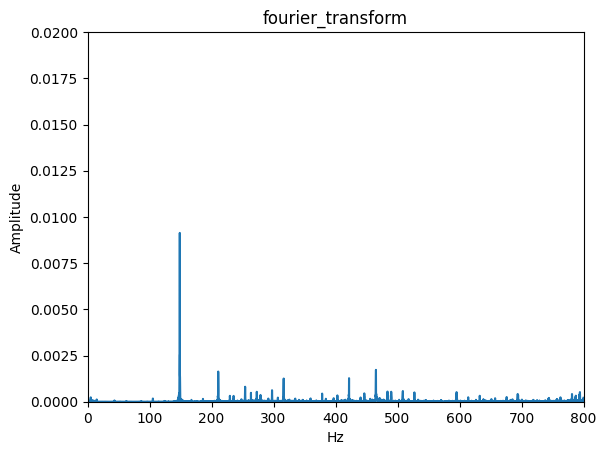

In [32]:
#################################TESTING#################################
# Get testing_y data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

testing_y_VibrationDataset = np.zeros((rawdata, m4), dtype=np.double)

try:
    dataset = pd.read_csv('testing_yVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
testing_y_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_testing_y = fourier_transform(testing_y_VibrationDataset, m4)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_testing_y = Hfeat_Vibration_testing_y ** 2
# **計算總能量
total_energy_testing_y = np.sum(energy_spectrum_testing_y)

# Feature extraction for testing_y data
Hamp_testing_y_vibration = np.zeros((m4, len1))

for count1 in range(36): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_testing_y_vibration[count1, 0] = np.sqrt(np.mean(testing_y_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_testing_y_vibration[count1, 1] = np.mean(testing_y_VibrationDataset[:, count1]) # 2-mean
    Hamp_testing_y_vibration[count1, 2] = kurtosis(testing_y_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_testing_y_vibration[count1, 3] = np.std(testing_y_VibrationDataset[:, count1]) # 4-std
    Hamp_testing_y_vibration[count1, 4] = skew(testing_y_VibrationDataset[:, count1]) # 5-skewness
    Hamp_testing_y_vibration[count1, 5] = np.max(testing_y_VibrationDataset[:, count1]) - np.min(testing_y_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_testing_y_vibration[count1, 6] = np.max(np.abs(testing_y_VibrationDataset[:, count1])) / Hamp_testing_y_vibration[count1, 0] # 7-Crest Factor
    Hamp_testing_y_vibration[count1, 7] = np.max(np.abs(testing_y_VibrationDataset[:, count1])) / np.mean(np.abs(testing_y_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_testing_y_vibration[count1, 8] = Hamp_testing_y_vibration[count1, 0] / np.mean(np.abs(testing_y_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_testing_y_vibration[count1, 9] = np.max(np.abs(testing_y_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(testing_y_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_testing_y_vibration[count1, 10] = np.sum(np.abs(testing_y_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_testing_y = energy_spectrum_testing_y[:, count1] / total_energy_testing_y
    p_testing_y = p_testing_y[p_testing_y > 0]
    entropy_testing_y = -np.sum(p_testing_y * np.log2(p_testing_y))
    Hamp_testing_y_vibration[count1, 11] = entropy_testing_y
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_testing_y_vibration[count1, 12] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_testing_y_vibration[count1, 13] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_testing_y_vibration[count1, 14] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_testing_y_vibration[count1, 15] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_testing_y_vibration[count1, 16] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_testing_y_vibration[count1, 17] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_testing_y_vibration[count1, 18] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_testing_y_vibration[count1, 19] = max(Hfeat_Vibration_testing_y[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#testing_zVibrationDataset.csv

###Need change:
* testing_y_VibrationDataset 改成 testing_z_VibrationDataset
* testing_yVibrationDataset.csv 改成 testing_zVibrationDataset.csv
* Hfeat_Vibration_testing_y 改成 Hfeat_Vibration_testing_z
* energy_spectrum_testing_y  改成 energy_spectrum_testing_z
* total_energy_testing_y 改成 total_energy_testing_z
* Hamp_testin_y_vibration 改成 Hamp_testin_z_vibration
* p_testing_y 改成 p_testing_z
* entropy_testing_y 改成 entropy_testing_z

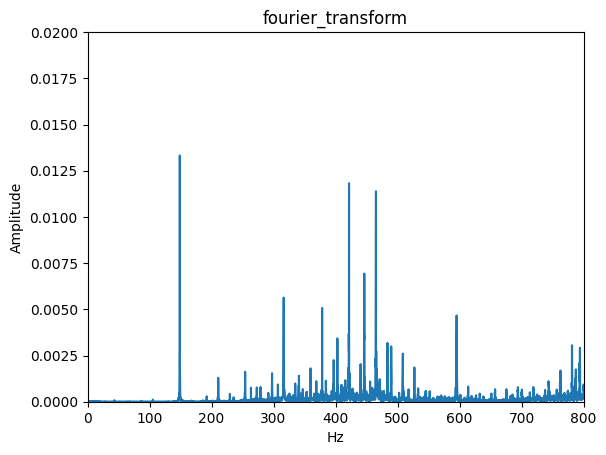

In [33]:
#################################TESTING#################################
# Get testing_z data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

testing_z_VibrationDataset = np.zeros((rawdata, m4), dtype=np.double)

try:
    dataset = pd.read_csv('testing_zVibrationDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
testing_z_VibrationDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_Vibration_testing_z = fourier_transform(testing_z_VibrationDataset, m4)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_testing_z = Hfeat_Vibration_testing_z ** 2
# **計算總能量
total_energy_testing_z = np.sum(energy_spectrum_testing_z)

# Feature extraction for testing_z data
Hamp_testing_z_vibration = np.zeros((m4, len1))

for count1 in range(36): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_testing_z_vibration[count1, 0] = np.sqrt(np.mean(testing_z_VibrationDataset[:, count1] ** 2)) # 1-rms
    Hamp_testing_z_vibration[count1, 1] = np.mean(testing_z_VibrationDataset[:, count1]) # 2-mean
    Hamp_testing_z_vibration[count1, 2] = kurtosis(testing_z_VibrationDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_testing_z_vibration[count1, 3] = np.std(testing_z_VibrationDataset[:, count1]) # 4-std
    Hamp_testing_z_vibration[count1, 4] = skew(testing_z_VibrationDataset[:, count1]) # 5-skewness
    Hamp_testing_z_vibration[count1, 5] = np.max(testing_z_VibrationDataset[:, count1]) - np.min(testing_z_VibrationDataset[:, count1]) # 6-PeakToPeak
    Hamp_testing_z_vibration[count1, 6] = np.max(np.abs(testing_z_VibrationDataset[:, count1])) / Hamp_testing_z_vibration[count1, 0] # 7-Crest Factor
    Hamp_testing_z_vibration[count1, 7] = np.max(np.abs(testing_z_VibrationDataset[:, count1])) / np.mean(np.abs(testing_z_VibrationDataset[:, count1])) # 8-Impulse Factor
    Hamp_testing_z_vibration[count1, 8] = Hamp_testing_z_vibration[count1, 0] / np.mean(np.abs(testing_z_VibrationDataset[:, count1])) # 9-Shape Factor
    Hamp_testing_z_vibration[count1, 9] = np.max(np.abs(testing_z_VibrationDataset[:, count1])) / (np.mean(np.sqrt(np.abs(testing_z_VibrationDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_testing_z_vibration[count1, 10] = np.sum(np.abs(testing_z_VibrationDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    p_testing_z = energy_spectrum_testing_z[:, count1] / total_energy_testing_z
    p_testing_z = p_testing_z[p_testing_z > 0]
    entropy_testing_z = -np.sum(p_testing_z * np.log2(p_testing_z))
    Hamp_testing_z_vibration[count1, 11] = entropy_testing_z
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_testing_z_vibration[count1, 12] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_testing_z_vibration[count1, 13] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_testing_z_vibration[count1, 14] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_testing_z_vibration[count1, 15] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_testing_z_vibration[count1, 16] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_testing_z_vibration[count1, 17] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_testing_z_vibration[count1, 18] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_testing_z_vibration[count1, 19] = max(Hfeat_Vibration_testing_z[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


#testing_VoltageDataset.csv

###Need change:
* healthy_VoltageDataset 改成 testing_VoltageDataset

* healthy_VoltageDataset.csv 改成 testing_VoltageDataset.csv

* Hamp_healthy_Voltage 改成 Hamp_testing_Voltage (用於儲存20個特徵的 numpy array)

* Hfeat_Voltage 改成 Hfeat_testing_Voltage

* energy_spectrum_Voltage 改成 energy_spectrum_testing_Voltage

* total_energy_Voltage 改成 total_energy_testing_Voltage

* p_Voltage 改成 p_testing_Voltage

* entropy_Voltage 改成 entropy_testing_Voltage

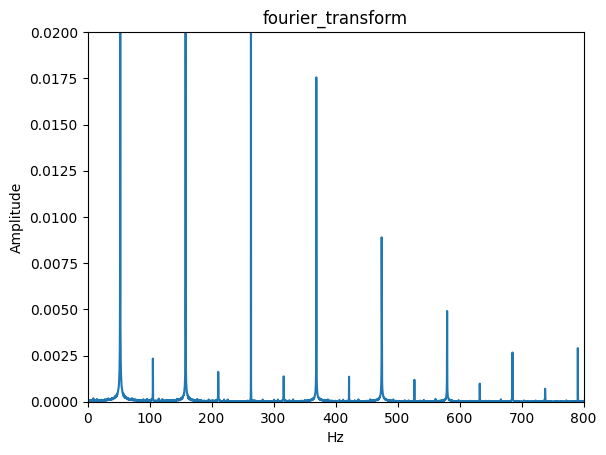

In [34]:
#################################TESTING#################################
# Get testing_Voltage data from csv directory
os.chdir(csvDirectory) # Change directory to csv file directory

testing_VoltageDataset = np.zeros((rawdata, m4), dtype=np.double)

try:
    dataset = pd.read_csv('testing_VoltageDataset.csv')
except FileNotFoundError:
    print("找不到資料檔案，無法讀取檔案!!!")
testing_VoltageDataset = dataset.iloc[:, :].values

# Fourier Transform and plot spectrum figure
Hfeat_testing_Voltage = fourier_transform(testing_VoltageDataset, m4)

# **計算每個頻率的能量分佈（振幅平方）
energy_spectrum_testing_Voltage = Hfeat_testing_Voltage ** 2
# **計算總能量
total_energy_testing_Voltage = np.sum(energy_spectrum_testing_Voltage)

# Feature extraction for testing data
Hamp_testing_Voltage = np.zeros((m4, len1))

for count1 in range(36): #每筆資料都要提取20個特徵
    # Time domain features
    Hamp_testing_Voltage[count1, 0] = np.sqrt(np.mean(testing_VoltageDataset[:, count1] ** 2)) # 1-rms
    Hamp_testing_Voltage[count1, 1] = np.mean(testing_VoltageDataset[:, count1]) # 2-mean
    Hamp_testing_Voltage[count1, 2] = kurtosis(testing_VoltageDataset[:, count1], axis=0, fisher=False) # 3-kurtosis
    Hamp_testing_Voltage[count1, 3] = np.std(testing_VoltageDataset[:, count1]) # 4-std
    Hamp_testing_Voltage[count1, 4] = skew(testing_VoltageDataset[:, count1]) # 5-skewness
    Hamp_testing_Voltage[count1, 5] = np.max(testing_VoltageDataset[:, count1]) - np.min(testing_VoltageDataset[:, count1])  # 6-PeakToPeak
    Hamp_testing_Voltage[count1, 6] = np.max(np.abs(testing_VoltageDataset[:, count1])) / Hamp_testing_Voltage[count1, 0] # 7-Crest Factor
    Hamp_testing_Voltage[count1, 7] = np.max(np.abs(testing_VoltageDataset[:, count1])) / np.mean(np.abs(testing_VoltageDataset[:, count1])) # 8-Impulse Factor
    Hamp_testing_Voltage[count1, 8] = Hamp_testing_Voltage[count1, 0] / np.mean(np.abs(testing_VoltageDataset[:, count1])) # 9-Shape Factor
    Hamp_testing_Voltage[count1, 9] = np.max(np.abs(testing_VoltageDataset[:, count1])) / (np.mean(np.sqrt(np.abs(testing_VoltageDataset[:, count1])))) ** 2 # 10-Clearance Factor
    Hamp_testing_Voltage[count1, 10] = np.sum(np.abs(testing_VoltageDataset[:, count1]) ** 2) # 11-Energy

    ########## 12-Entropy ##########
    # 將每個頻率的能量正規化為概率分佈
    p_testing_Voltage = energy_spectrum_testing_Voltage[:, count1] / total_energy_testing_Voltage

    # 去除 p 中的零值以避免 log(0) 錯誤
    p_testing_Voltage = p_testing_Voltage[p_testing_Voltage > 0]

    # 計算熵
    entropy_testing_Voltage = -np.sum(p_testing_Voltage * np.log2(p_testing_Voltage))

    Hamp_testing_Voltage[count1, 11] = entropy_testing_Voltage
    ########## 12-Entropy ##########

    # Frequency domain features
    Hamp_testing_Voltage[count1, 12] = max(Hfeat_testing_Voltage[int((baseFreq1 * 1 - dFreq1) / dF):int((baseFreq1 * 1 + dFreq1) / dF), count1])  # 13-FFT1X
    Hamp_testing_Voltage[count1, 13] = max(Hfeat_testing_Voltage[int((baseFreq1 * 2 - dFreq1) / dF):int((baseFreq1 * 2 + dFreq1) / dF), count1])  # 14-FFT2X
    Hamp_testing_Voltage[count1, 14] = max(Hfeat_testing_Voltage[int((baseFreq1 * 3 - dFreq1) / dF):int((baseFreq1 * 3 + dFreq1) / dF), count1])  # 15-FFT3X
    Hamp_testing_Voltage[count1, 15] = max(Hfeat_testing_Voltage[int((baseFreq1 * 4 - dFreq1) / dF):int((baseFreq1 * 4 + dFreq1) / dF), count1])  # 16-FFT4X
    Hamp_testing_Voltage[count1, 16] = max(Hfeat_testing_Voltage[int((baseFreq1 * 5 - dFreq2) / dF):int((baseFreq1 * 5 + dFreq2) / dF), count1])  # 17-FFT5X
    Hamp_testing_Voltage[count1, 17] = max(Hfeat_testing_Voltage[int((baseFreq1 * 6 - dFreq2) / dF):int((baseFreq1 * 6 + dFreq2) / dF), count1])  # 18-FFT6X
    Hamp_testing_Voltage[count1, 18] = max(Hfeat_testing_Voltage[int((baseFreq1 * 7 - dFreq3) / dF):int((baseFreq1 * 7 + dFreq3) / dF), count1])  # 19-FFT7X
    Hamp_testing_Voltage[count1, 19] = max(Hfeat_testing_Voltage[int((baseFreq1 * 8 - dFreq4) / dF):int((baseFreq1 * 8 + dFreq4) / dF), count1])  # 20-FFT8X


In [35]:
### testing_allFeature
testing_allFeature=np.zeros((m4,len1*4)) # x-axis vibration + y-axis vibration + voltage = 30 features
testing_allFeature[:,0:len1] = Hamp_testing_x_vibration[:,0:len1]
testing_allFeature[:,len1:len1*2] = Hamp_testing_y_vibration[:,0:len1]
testing_allFeature[:,len1*2:len1*3] = Hamp_testing_z_vibration[:,0:len1]
testing_allFeature[:,len1*3:len1*4] = Hamp_testing_Voltage[:,0:len1]
# save healthy features
os.chdir(featureDirectory) # Change directory to feature file directory
with open('featureTesting.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(feature_name)
  writer.writerows(testing_allFeature)

### Feature training ###
training_file_num = m1+m2
training_allFeature=np.zeros((training_file_num,len1*3))
training_allFeature[0:m1,:]=healthy_allFeature[0:m1,:]
training_allFeature[m1:m1+m2,:]=faulty_allFeature[0:m2,:]
os.chdir(featureDirectory) # Change directory to feature file directory
with open('training_allFeature.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(feature_name)
  writer.writerows(training_allFeature)

os.chdir(currentDirectory) # Change directory to csv root directory

In [36]:
### Feature training ###
training_file_num = m1+m2+m3 #(healthy + faulty1 + faulty2)
training_allFeature = np.zeros((training_file_num,len1*4))

training_allFeature[0:m1,:]=healthy_allFeature[0:m1,:]
training_allFeature[m1:m1+m2,:]=faulty1_allFeature[0:m2,:]
training_allFeature[m1+m2:m1+m2+m3,:]=faulty2_allFeature[0:m3,:]
os.chdir(featureDirectory) # Change directory to feature file directory
with open('training_allFeature.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(feature_name)
  writer.writerows(training_allFeature)

os.chdir(currentDirectory) # Change directory to csv root directory